# Network analysis with NetworkX

For network analysis in Python we use the the package **NetworkX**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import networkx as nx

## Creating graphs, basic operations

In [3]:
# create an empty undirectional graph without nodes or edges
G = nx.Graph()            
print(G.nodes(), G.edges())

[] []


In [4]:
# add a single node
G.add_node(1)    
print(G.nodes())

[1]


In [5]:
# add a list of nodes
G.add_nodes_from([2,3])    
print(G.nodes())
G.number_of_nodes()
print('number of nodes:', G.number_of_nodes())

[1, 2, 3]
number of nodes: 3


In [6]:
# basic summary
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 0
Average degree:   0.0000


In [7]:
# reset network
G.clear()
print(G.nodes())
G.add_nodes_from([51,52,55,"a"])

[]


In [8]:
# add edge
G.add_edge(1,2)
print(G.nodes(), G.edges())
print(nx.info(G))

[51, 52, 55, 'a', 1, 2] [(1, 2)]
Name: 
Type: Graph
Number of nodes: 6
Number of edges: 1
Average degree:   0.3333


In [9]:
# create network from edgelist
G.clear()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())

[(1, 2), (1, 3)]


In [10]:
# adding an edge that is already present
G.add_edges_from([(2,1)]) 
print(G.edges())
print(G.nodes())
print(nx.info(G))

[(1, 2), (1, 3)]
[1, 2, 3]
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [11]:
# create directional network
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2,3)])
print(G.edges())
G.add_edges_from([(2,1)])
print(G.edges())

[(1, 2), (1, 3), (2, 3)]
[(1, 2), (1, 3), (2, 3), (2, 1)]


In [12]:
# listing neighbours of node 1
print("Neighbors",list(G.neighbors(1)))
print("Successors",list(G.successors(1)))
print("Predecessors",list(G.predecessors(1)))

Neighbors [2, 3]
Successors [2, 3]
Predecessors [2]


In [13]:
# loops
# data=True to includes node attributes as dictionaries
# so far, no attributes
for node, data in G.nodes(data=True):
    print(node, data)

1 {}
2 {}
3 {}


In [14]:
for n1, n2, data in G.edges(data=True):
    print(n1, " <----> ", n2, data)

1  <---->  2 {}
1  <---->  3 {}
2  <---->  3 {}
2  <---->  1 {}


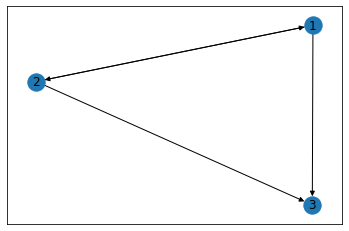

In [15]:
# drawing basic graphs
nx.draw_networkx(G, with_labels=True)
plt.show()

[(1, 2), (1, 3)]


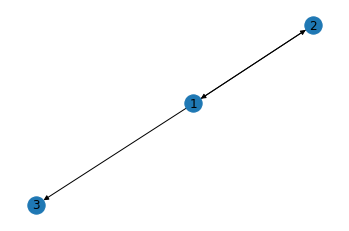

In [16]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())
G.add_edge(2,1)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

In [17]:
# creating network from adjacency matrix

# create matrix
#𝐴ij=1 if nodes i and 𝑗 are connected, Aij=0 otherwise.
adj = np.array([[0, 0, 1],
                [1, 0, 0],
                [1, 1, 0]])

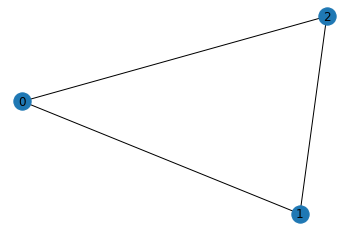

In [18]:
# create graph
G = nx.from_numpy_matrix(adj, create_using=nx.DiGr)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

In [19]:
#Operations

# degree
print(G.degree(0))
# a DegreeView that can be converted to a dictionary)
print(dict(G.degree()))
# only degree values
print(dict(G.degree()).values())

2
{0: 2, 1: 2, 2: 2}
dict_values([2, 2, 2])


In [20]:
# local transitivity
nx.clustering(G)

{0: 1.0, 1: 1.0, 2: 1.0}

In [21]:
# global transitivity
nx.transitivity(G)

1.0

In [22]:
# edge attributes
G = nx.Graph()
# adding two attributes
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")
# edge attributes of edge (1, 2)
print(G[1][2])

{'weight': 10, 'transport': 'bus'}


In [23]:
# looping
for e in G.edges():
    print(e)

(1, 2)
(2, 3)


In [24]:
# with attributes (data)
for e in G.edges(data=True):
    print(e)

(1, 2, {'weight': 10, 'transport': 'bus'})
(2, 3, {'weight': 5, 'transport': 'train'})


In [25]:
for [e1, e2, w] in G.edges(data=True):
    print("%d -- %d [weight=%g];" % (e1,e2,w['weight']))

1 -- 2 [weight=10];
2 -- 3 [weight=5];


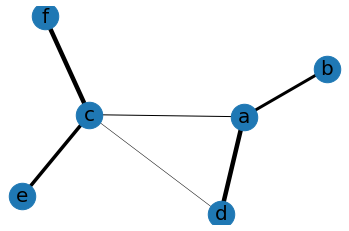

In [26]:
G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.9)

edges = [(u, v) for (u, v) in G.edges()]
weight = [d['weight']*5.0 for (u, v, d) in G.edges(data=True)]

# layout: dynamical model for node positions
pos = nx.spring_layout(G)
# draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# draw edges
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weight)
# draw labels
nx.draw_networkx_labels(G, pos, font_size=20)
plt.axis('off')
plt.show()

In [ ]:
# diamater and average path length
nx.diameter(G)

In [32]:
nx.average_shortest_path_length(G)

1.3333333333333333

In [33]:
# with weight
nx.average_shortest_path_length(G, weight="weight")

1.3333333333333333

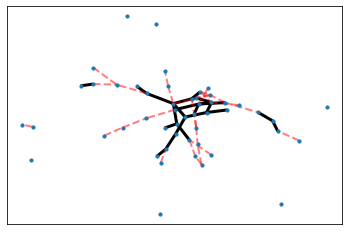

In [34]:
#Exercise: create network with 50 nodes and 50 edges with random weights
G = nx.Graph()
G.add_nodes_from([i for i in range(50)])
for i in range(50):
    node1, node2 = np.random.choice(list(G.nodes()),2)
    G.add_edge(node1,node2)

for i,j, data in G.edges(data=True):
    data['weight'] = np.random.random()
#print(list(G.edges(data=True)))

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=0.5, edge_color='r', style='dashed')

## Model networks

In [35]:
# Model networks

#random graph networks
# create random graph with 1000 nodes and prob of edge p=0.01
G = nx.erdos_renyi_graph(1000, 0.01)

In [36]:
# create list of degrees
x = [G.degree([i][0]) for i in range(len(G))]
print(x)

[12, 12, 10, 9, 17, 13, 16, 16, 4, 13, 12, 10, 11, 8, 7, 10, 8, 10, 12, 8, 9, 9, 16, 12, 9, 13, 6, 10, 12, 9, 7, 8, 6, 17, 8, 12, 9, 12, 8, 8, 12, 10, 14, 10, 10, 12, 10, 10, 7, 14, 8, 11, 15, 11, 13, 12, 15, 15, 11, 12, 13, 9, 14, 12, 11, 10, 12, 9, 7, 7, 8, 9, 7, 7, 11, 8, 14, 11, 13, 7, 9, 11, 10, 11, 10, 9, 12, 8, 9, 13, 4, 9, 7, 12, 7, 11, 10, 11, 9, 7, 12, 12, 4, 7, 8, 16, 10, 11, 14, 9, 6, 13, 4, 9, 13, 11, 11, 8, 9, 13, 12, 10, 11, 6, 10, 12, 10, 10, 6, 12, 12, 8, 12, 8, 13, 7, 11, 10, 7, 11, 8, 7, 11, 13, 14, 16, 8, 8, 11, 9, 12, 14, 8, 4, 13, 8, 5, 10, 10, 12, 9, 8, 9, 11, 8, 9, 10, 13, 7, 15, 18, 13, 7, 6, 11, 15, 9, 7, 9, 8, 13, 14, 12, 9, 12, 9, 8, 11, 10, 12, 10, 17, 7, 5, 12, 7, 8, 6, 12, 8, 13, 11, 12, 7, 10, 9, 11, 11, 7, 9, 8, 8, 5, 14, 12, 13, 7, 8, 11, 10, 12, 7, 10, 6, 7, 8, 6, 11, 12, 9, 13, 8, 6, 7, 10, 8, 5, 7, 9, 11, 13, 8, 10, 16, 9, 12, 5, 8, 10, 11, 8, 9, 8, 13, 8, 8, 9, 13, 12, 9, 12, 10, 9, 9, 13, 8, 14, 14, 11, 11, 11, 7, 13, 9, 10, 12, 9, 7, 10, 10, 8, 9

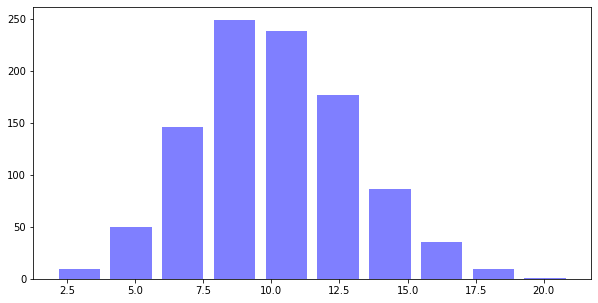

In [37]:
# plot histogram with degree distribution
plt.figure(figsize=[10,5])
plt.hist(x, facecolor='b', alpha=.5, rwidth=.8)
plt.show()


(array([0.00473684, 0.02631579, 0.07684211, 0.13105263, 0.12526316,
        0.09315789, 0.04526316, 0.01842105, 0.00473684, 0.00052632]),
 array([ 2. ,  3.9,  5.8,  7.7,  9.6, 11.5, 13.4, 15.3, 17.2, 19.1, 21. ]),
 <BarContainer object of 10 artists>)

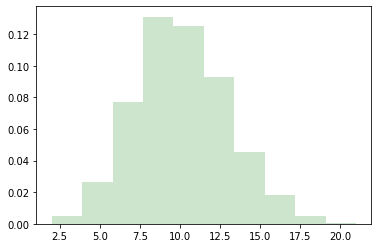

In [38]:
# alternative
degree = np.array(G.degree())[:,1:]
plt.hist(degree, 10, density=True, facecolor='g', alpha=.2)

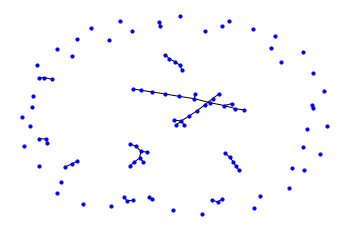

In [43]:
#connected components
ER_graph=nx.erdos_renyi_graph(100, 0.01)
nx.draw_networkx(ER_graph, with_labels=False,node_size=10, node_color='blue')
plt.axis('off')
plt.show()

In [44]:
for c in nx.connected_components(ER_graph):
    print(c)
#how many components
len(sorted(nx.connected_components(ER_graph)))

{0, 82, 77}
{1}
{2, 99, 14, 26, 29}
{3, 5, 38, 46, 78, 16, 49, 23, 61}
{10, 4, 28}
{32, 34, 6, 27, 41, 91, 74, 13, 47, 50, 59, 92}
{64, 36, 70, 7, 40, 19, 21, 58}
{8, 11, 83, 85, 62}
{9, 53, 71}
{12}
{15}
{17, 69}
{18}
{20}
{22}
{24}
{25}
{30, 95}
{31}
{33}
{35}
{89, 73, 37}
{39}
{42}
{57, 43, 44}
{45}
{48}
{51}
{52}
{54}
{55}
{56}
{60}
{63}
{65}
{66}
{67}
{68}
{72}
{75}
{76}
{84, 79}
{80}
{81}
{86}
{87}
{88}
{90}
{93}
{94}
{96}
{97}
{98}


53

In [45]:
#centrality
nx.betweenness_centrality(ER_graph)

{0: 0.0,
 1: 0.0,
 2: 0.0006184291898577612,
 3: 0.0,
 4: 0.00020614306328592042,
 5: 0.0,
 6: 0.0,
 7: 0.002886002886002886,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0006184291898577612,
 12: 0.0,
 13: 0.0,
 14: 0.0006184291898577612,
 15: 0.0,
 16: 0.003092145949288806,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.002886002886002886,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0008245722531436817,
 27: 0.007215007215007215,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.005359719645433931,
 33: 0.0,
 34: 0.0037105751391465673,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.002473716759431045,
 39: 0.0,
 40: 0.0,
 41: 0.0020614306328592042,
 42: 0.0,
 43: 0.0,
 44: 0.00020614306328592042,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.001443001443001443,
 50: 0.0020614306328592042,
 51: 0.0,
 52: 0.0,
 53: 0.00020614306328592042,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.005772005772005772,
 60: 0.0,
 61: 0.0032982890125747267,
 62: 0.0006184291898577612,
 63: 0.0,
 64: 0.00123685

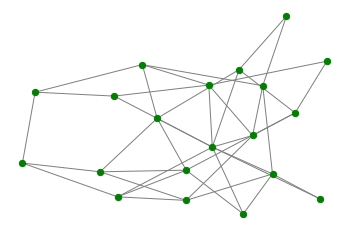

In [47]:
#small-world network
#here, nei=number of neighbours on BOTH sidesm different from R where nei= neighbours on EACH side
SW_graph = nx.watts_strogatz_graph(20, 4, 1)
nx.draw_networkx(SW_graph, with_labels=False,node_size=40, node_color='green', edge_color='grey')
plt.axis('off')
plt.show()

## Importing data from txt files

In [48]:
#importing
file_name = 'hgcamp.txt'
G=nx.read_weighted_edgelist(file_name, nodetype=int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 477
Average degree:  18.0000


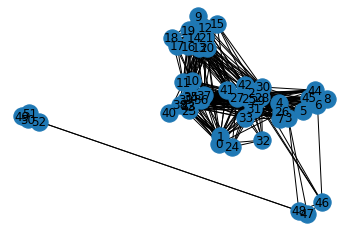

In [49]:
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()